## Linear Regression 

$$ \hat {y} = \beta_0 + \beta_1 X $$

In [6]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,4)

In [7]:
##let's take height in cms
height = np.random.normal(130.0,20,1000)

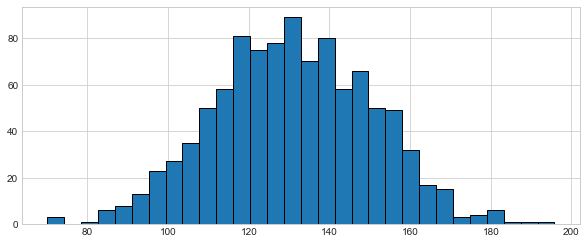

In [9]:
plt.hist(height,bins=30,edgecolor='k')
plt.show()

In [21]:
# y = mx + c 
weight = np.random.randn(1000) + 0.4*height + np.random.randn(1000)*3

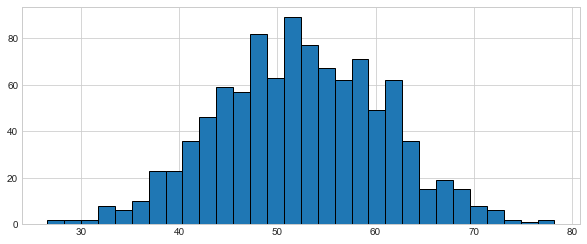

In [22]:
plt.hist(weight,bins=30,edgecolor='k')
plt.show()

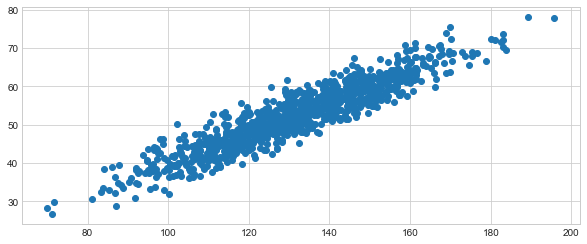

In [23]:
plt.scatter(height,weight)
plt.show()

### Data Quantitive 
### target should be linearly dependent on features

$$ \hat {y} = \beta_0 + \beta_1 X $$

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
height[:5]

array([156.76005218, 167.12027269, 128.05401377, 134.16647146,
       122.36633943])

In [35]:
#np.random.randint(1,10,100).reshape(-1,1)

In [26]:
type(height)

numpy.ndarray

In [27]:
height.ndim

1

In [28]:
height.shape

(1000,)

In [36]:
height = height.reshape(-1,1)
height.shape

(1000, 1)

In [50]:
height.ndim

2

In [51]:
height[:5]

array([[156.76005218],
       [167.12027269],
       [128.05401377],
       [134.16647146],
       [122.36633943]])

In [52]:
X_train,X_test,y_train,y_test = train_test_split(height,weight,test_size=.30,random_state=41)

In [53]:
X_train.ndim

2

In [54]:
X_train.size

700

In [55]:
X_train[:5]

array([[110.16908085],
       [ 99.8267107 ],
       [135.22421737],
       [124.8651728 ],
       [154.61529331]])

In [57]:
X_test.size

300

In [58]:
X_test[:5]

array([[ 86.89630174],
       [133.22352051],
       [140.62284059],
       [149.31347853],
       [115.93547521]])

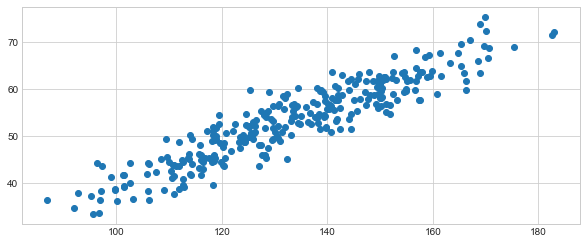

In [59]:
plt.scatter(X_test,y_test)
plt.show()

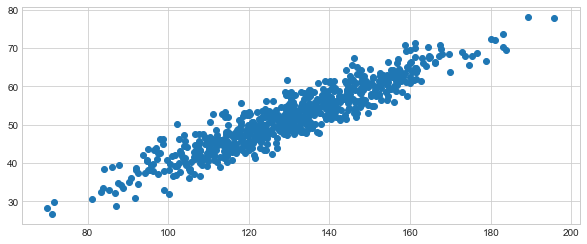

In [60]:
plt.scatter(X_train,y_train)
plt.show()

In [62]:
model = LinearRegression()
# machine learning algo 

In [63]:
# Training 

model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

$$ \hat {y} = \beta_0 + \beta_1 X $$

In [65]:
# this is your 𝛽0
model.intercept_ 

0.7122047288318214

In [67]:
# this is your 𝛽1
model.coef_

array([0.39376948])

In [68]:
# prediction weight on height 𝑦
model.intercept_+ model.coef_*160

array([63.71532096])

In [70]:
model.predict(np.array([160,120,130,150,140,135,136]).reshape(-1,1))

array([63.71532096, 47.9645419 , 51.90223667, 59.77762619, 55.83993143,
       53.87108405, 54.26485352])

In [72]:
### Evaluating 

y_pred = model.predict(X_test)

In [73]:
X_test[:5]

array([[ 86.89630174],
       [133.22352051],
       [140.62284059],
       [149.31347853],
       [115.93547521]])

In [74]:
y_test[:5]

array([36.3010793 , 54.04771812, 56.53045328, 60.46433383, 48.10989554])

In [75]:
y_pred[:5]

array([34.92931597, 53.17156065, 56.08518704, 59.50729499, 46.3640561 ])

In [76]:
mean_squared_error(y_test,y_pred)

10.281747644057429

In [77]:
r2_score(y_test,y_pred)

0.8556391879812768

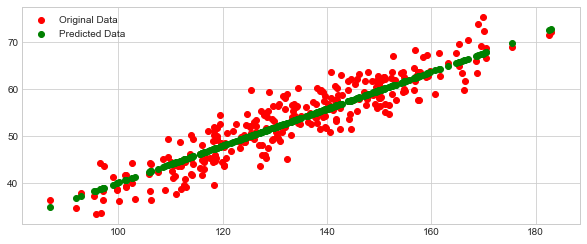

In [79]:
plt.scatter(X_test,y_test,label="Original Data",c='r')
plt.scatter(X_test,y_pred,label="Predicted Data",c='g')
plt.legend()
plt.show()

## Multiple linear regression 

In [83]:
#ls "ISLR_DATASET/""

In [86]:
df = pd.read_csv("ISLR_DATASET/Advertising.csv",index_col=0)

In [87]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


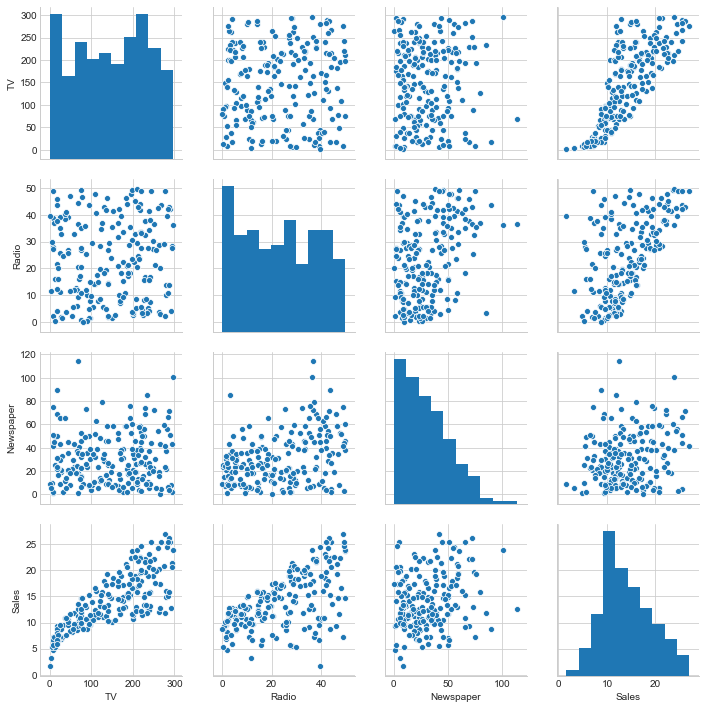

In [88]:
sns.pairplot(df)
plt.show()

$$ \hat {Sales} = \beta_0 + \beta_1 TV + \beta_2 Radio $$

In [89]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [90]:
features = df[['TV','Radio']]
target = df['Sales']

In [91]:
features.head() # tv, and radio 

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8


In [92]:
target.head() # sales 

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [93]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.30,random_state=42)

In [94]:
X_train.head()

,TV,Radio
170,284.3,10.6
98,184.9,21.0
32,112.9,17.4
13,23.8,35.1
36,290.7,4.1


In [95]:
X_test.head()

,TV,Radio
96,163.3,31.6
16,195.4,47.7
31,292.9,28.3
159,11.7,36.9
129,220.3,49.0


In [96]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


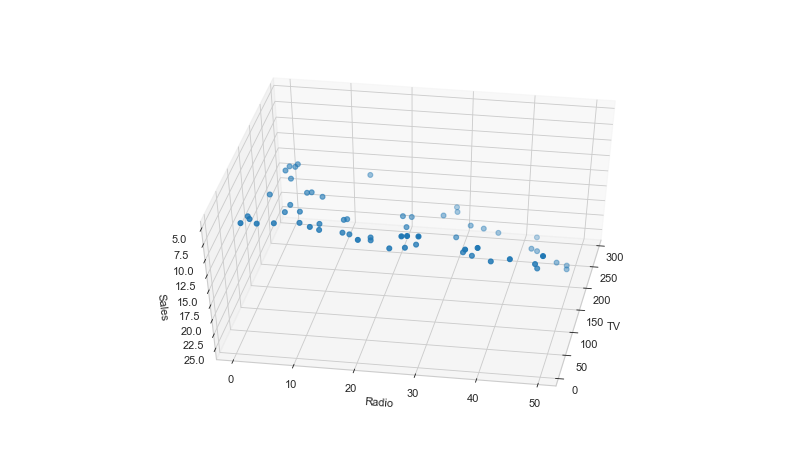

In [101]:
%matplotlib notebook
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs=X_test['TV'],ys=X_test['Radio'],zs=y_test)
ax.set_xlabel("TV")
ax.set_ylabel("Radio")
ax.set_zlabel("Sales")
plt.show()

In [102]:
model = LinearRegression()

In [103]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
model.coef_

array([0.04407736, 0.20260566])

In [105]:
model.intercept_

2.8376172369051815

In [108]:
tv = 100
radio = 300
sales = model.intercept_ + model.coef_[0]*tv + model.coef_[1]*radio

In [109]:
sales

68.02705148407546

In [110]:
y_pred = model.predict(X_test)

In [111]:
X_test[:5]

,TV,Radio
96,163.3,31.6
16,195.4,47.7
31,292.9,28.3
159,11.7,36.9
129,220.3,49.0


In [113]:
y_test[:5]

96     16.9
16     22.4
31     21.4
159     7.3
129    24.7
Name: Sales, dtype: float64

In [114]:
y_pred[:5]

array([16.43778963, 21.11462413, 21.48161733, 10.82947123, 22.47553785])

In [115]:
mean_squared_error(y_test,y_pred)

3.6690470545306813

In [116]:
r2_score(y_test,y_pred)

0.8656253548947074

<IPython.core.display.Javascript object>


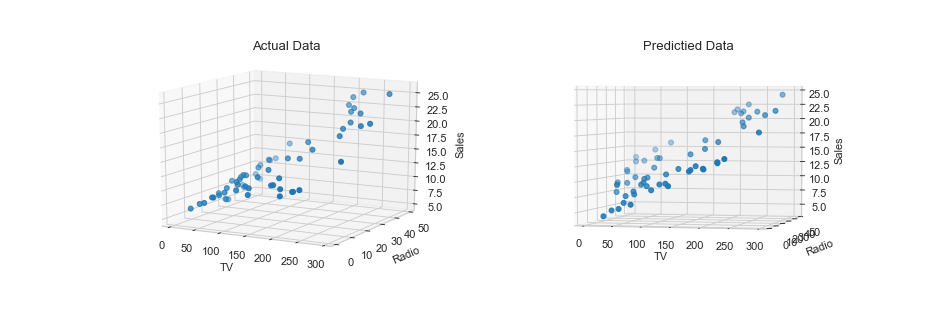

In [121]:
%matplotlib notebook
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121,projection='3d')
ax.scatter(xs=X_test['TV'],ys=X_test['Radio'],zs=y_test)
ax.set_xlabel("TV")
ax.set_ylabel("Radio")
ax.set_zlabel("Sales")
ax.set_title("Actual Data")
ax1 = fig.add_subplot(122,projection='3d')
ax1.scatter(xs=X_test['TV'],ys=X_test['Radio'],zs=y_pred)
ax1.set_xlabel("TV")
ax1.set_ylabel("Radio")
ax1.set_zlabel("Sales")
ax1.set_title("Predictied Data")
plt.show()

## Polynomail Regession 

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,4)

In [21]:
##let's take height in cms
height = np.random.normal(130.0,20,100)

In [22]:
height[:5]

array([120.42553599, 135.34169866, 131.83227188, 117.78891867,
       145.93863532])

$$ y = ax^3 + bx^2 + cx + c $$ 

In [23]:
height.size

100

In [24]:
weight = height ** 3 + np.random.randn(100)*100 + (np.random.randn(100)+5)

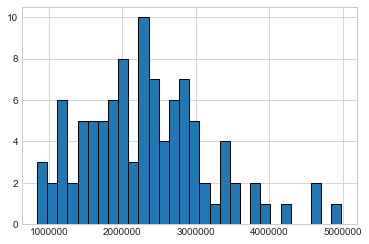

In [25]:
%matplotlib inline 
plt.hist(weight,bins=30,edgecolor='k')
plt.show()

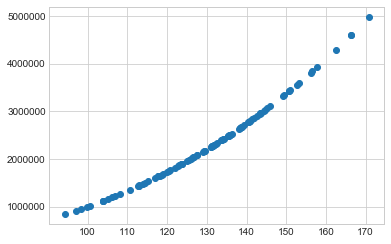

In [26]:
plt.scatter(height,weight)
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
model.fit(height.reshape(-1,1),weight)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
model.coef_

array([51751.95062831])

In [32]:
model.intercept_

-4426972.367931658

In [33]:
y_pred = model.predict(height.reshape(-1,1))
y_pred.shape

(100,)

In [36]:
y_pred.ravel().size

100

In [41]:
from sklearn.metrics import mean_squared_error,r2_score

mean_squared_error(weight,y_pred.ravel())

19554895536.002228

In [43]:
r2_score(weight,y_pred.ravel())

0.9733143773581169

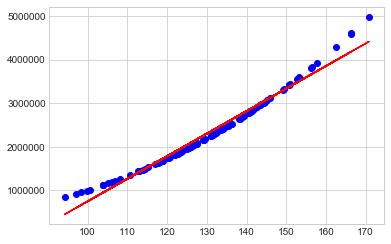

In [39]:
plt.scatter(height,weight,label="Original",c='b')
plt.plot(height,y_pred.ravel(),label="Prideicted",c="r")
plt.show()

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
height = height.reshape(-1,1)

In [74]:
poly = PolynomialFeatures(degree=2)

In [75]:
poly_x = poly.fit_transform(height)

In [76]:
height[:5]

array([[120.42553599],
       [135.34169866],
       [131.83227188],
       [117.78891867],
       [145.93863532]])

In [77]:
poly_x[:5]
# y  = ax**2 + bx + c 

array([[1.00000000e+00, 1.20425536e+02, 1.45023097e+04],
       [1.00000000e+00, 1.35341699e+02, 1.83173754e+04],
       [1.00000000e+00, 1.31832272e+02, 1.73797479e+04],
       [1.00000000e+00, 1.17788919e+02, 1.38742294e+04],
       [1.00000000e+00, 1.45938635e+02, 2.12980853e+04]])

In [78]:
model = LinearRegression()

In [79]:
model.fit(poly_x,weight)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
y_pred = model.predict(poly_x)

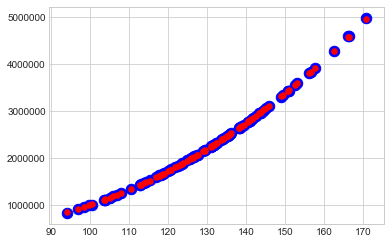

In [81]:
plt.scatter(height,weight,label="Original",c='b',s=110)
plt.scatter(height,y_pred,label="Prideicted",c="r",s=30)
plt.show()

In [82]:
mean_squared_error(weight,y_pred)

50752592.40591492

In [73]:
r2_score(weight,y_pred)

0.9999999880747185